# Jupyter and reveal.js

# Jupyter is cool 'cause you can

- run single cells or entire notebooks
- have inline plots and outputs
- insert Markdown cells, with latex capabilities: $\sum_{i=0}^{\infty}X_i$
- call python scripts
- run parallel calculations
- execute commands on the terminal
- create interactive slides with reveal.js
- post your notebook online ( [example](http://www.statsmodels.org/stable/examples/notebooks/generated/statespace_sarimax_stata.html) )
- $\dots$

![Anaconda](https://www.continuum.io/sites/all/themes/continuum/assets/images/logos/logo-horizontal-large.svg)

<br/>

I really like the [Anaconda](https://www.continuum.io/downloads) distrubution.

It contains Jupyter, basic python modules for data science, and it allows to easily install and update modules.

- You can execute python code live in the slides 
- Select a cell and press SHIFT+ENTER to execute it

In [4]:
import numpy as np, pandas as pd

N  = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
y  = 2*x1 + 0.5*x2 + 2 * np.random.randn(N)
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})

In [5]:
import statsmodels.formula.api as smf
smf.ols("y ~ x1 + x2", df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0964,0.204,-0.472,0.638,-0.502,0.309
x1,1.9339,0.229,8.440,0.000,1.479,2.389
x2,0.8725,0.193,4.532,0.000,0.490,1.255


With the following *magic command* you get inline plots

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


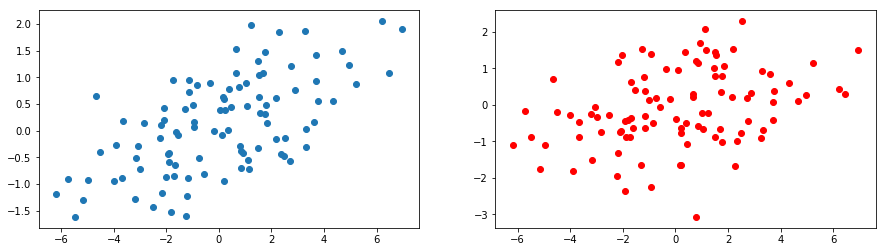

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4))
ax1.scatter(df['y'], df['x1']);
ax2.scatter(df['y'], df['x2'], color='r');

You can run a .py file 

In [ ]:
%run my_functions

... an entire notebook

In [ ]:
%run my_notebook.ipynb

... and commands in the terminal

In [ ]:
! ls

A great module for Jupyer is [ipyparallel](https://github.com/ipython/ipyparallel), which makes parallelization in Jupyter notebooks extremely easy

Once you install it, you can start some clusters from the terminal:

    ipcluster start -n 4

then you connect to these clusters from a notebook

In [ ]:
import ipyparallel as ipp
client = ipp.Client()
lview  = client.load_balanced_view(); lview.block = True

You can run cells in parallel simply by adding **%%px** to the cell

In [9]:
%%px
a = np.random.randint(10)
a

Out[0:52]: 6

Out[1:60]: 6

Out[2:58]: 8

Out[3:48]: 8

Out[4:45]: 7

Out[5:45]: 5

Out[6:45]: 7

Out[7:45]: 2

You can gather results from the clusters as follows

In [10]:
A = client[:].gather('a').get()
A

[6, 6, 8, 8, 7, 5, 7, 2]

And you can control individual clusters

In [11]:
%%px --target 1:3
b = a + 1
b

Out[1:61]: 7

Out[2:59]: 9

You can scatter arrays to the clusters

In [12]:
v = np.arange(40)
client[:].scatter('v',v)

<AsyncResult: scatter>

In [13]:
%%px --targe 2:4
v

Out[2:60]: array([10, 11, 12, 13, 14])

Out[3:49]: array([15, 16, 17, 18, 19])

It works also with DataFrames!

In [14]:
client[:].scatter('df',df)

<AsyncResult: scatter>

In [15]:
%%px --targe :2
df.head(2)

,x1,x2,y
0,0.136402,1.062375,1.841028
1,-0.716662,-0.348497,-2.986675


,x1,x2,y
13,-0.944679,-0.276867,-4.002696
14,0.872184,1.140234,5.228391


You can make calculations in parallel

In [16]:
%%px 
df['z'] = df['x1'] - df['x2']

And then gather the results

In [17]:
ds = pd.concat(client[:].gather('df').get())
ds.tail(2)

,x1,x2,y,z
98,-1.623678,-0.874995,-5.482606,-0.748683
99,-1.195395,-1.105568,-6.195477,-0.089827


## Jupyter Extensions

Check also the [Jupyter extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions), some of them are incredibly useful

For instance, I cannot live without these ones:
- Skip-TraceBack
- ExecuteTime
- CodeFolding
- Table of Contents

You can even embed youtube videos in the slides!

In [18]:
from IPython.display import HTML
HTML('''<iframe width="560" height="315" 
    src="https://www.youtube.com/embed/sXyFa_r1nxA?rel=0&amp;controls=0&amp;
    showinfo=0" frameborder="0" allowfullscreen></iframe>'''
)

A useful trick you may not know...

Using the **glob** module you can easily loop through files in a folder

In [ ]:
import glob
df = pd.DataFrame()
for file in glob.glob("data/file_name_*.csv"):
    df = df.append(pd.read_csv(file, sep=","))